<a href="https://colab.research.google.com/github/shin0105/4YP/blob/master/optimization_problems_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#installing packages
!pip install jaxopt
!pip install tinygp

In [3]:
#importing packages
import numpy as np
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp
import jaxopt
from tinygp import GaussianProcess, kernels, transforms
jax.config.update("jax_enable_x64", True)

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


Predicted minimum y value using GP: -0.9834443183536556
Minimum y value from sampled points: -0.933942310423408


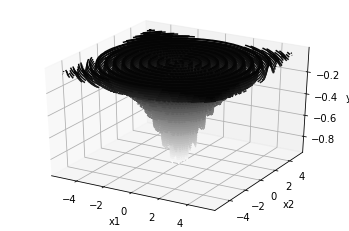

In [5]:
#DROP-WAVE FUNCTION using tinygp

#DROP-WAVE FUNCTION description
X = np.linspace((-5.12,-5.12),(5.12,5.12),100)
yerr = 0.01
y = -(1+np.cos(12*np.sqrt(X[:, 0]**2+X[:, 1]**2)))/(0.5*(X[:, 0]**2+X[:, 1]**2)+2) + yerr * np.random.normal(
    size=len(X))

#Plotting drop-wave function
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')
X1,X2 = np.meshgrid(X[:,0], X[:,1])
y_true = -(1+np.cos(12*np.sqrt(X1**2+X2**2)))/(0.5*(X1**2+X2**2)+2)
X_pred = np.vstack((X1.flatten(), X2.flatten())).T

ax.contour3D(X1, X2, y_true, 50, cmap='binary')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y');

#Training data
def train_gp(nparams, build_gp_func):
    @jax.jit
    def loss(params):
        return -build_gp_func(params).log_probability(y)

    params = {
        "log_amp": np.float64(0.0),
        "log_scale": np.zeros(nparams),
    }
    solver = jaxopt.ScipyMinimize(fun=loss)
    soln = solver.run(params)
    return build_gp_func(soln.params)

#Kernel = Matern v=5/2, uncorrelated 
def build_gp_uncorr(params):
    kernel = jnp.exp(params["log_amp"]) * transforms.Linear(
        jnp.exp(-params["log_scale"]), kernels.Matern52()
    )
    return GaussianProcess(kernel, X, diag=yerr**2)

uncorr_gp = train_gp(2, build_gp_uncorr)

y_pred = uncorr_gp.condition(y, X_pred).gp.loc.reshape(y_true.shape)

#printing results, comparing trained(predicted) data vs. true value
print(f"Predicted minimum y value using GP: {y_pred.min()}")

print(f"Minimum y value from sampled points: {y_true.min()}")

Predicted minimum y value using GP: 3.6513714185692328
Minimum y value from sampled points: 3.662771803460852


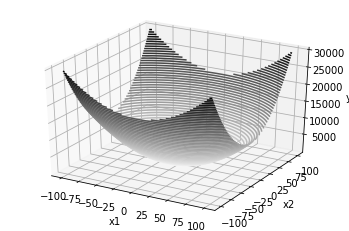

In [6]:
#BOHACHEVSKY FUNCTIONS using tinygp (Matern series)

#BOHACHEVSKY FUNCTIONS description
X = np.linspace((-100,-100),(100,100),100)
yerr = 0.01
y = X[:,0]**2 + 2*X[:,1]**2 - 0.3*np.cos(3*np.pi*X[:,0]) - 0.4*np.cos(4*np.pi*X[:,1]) + 0.7 + yerr * np.random.normal(
    size=len(X))

X1,X2 = np.meshgrid(X[:,0], X[:,1])
y_true = X1**2 + 2*X2**2 - 0.3*np.cos(3*np.pi*X1) - 0.4*np.cos(4*np.pi*X2) +0.7
X_pred = np.vstack((X1.flatten(), X2.flatten())).T

#Plotting function
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X1, X2, y_true, 50, cmap='binary')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y');

def train_gp(nparams, build_gp_func):
    @jax.jit
    def loss(params):
        return -build_gp_func(params).log_probability(y)

    params = {
        "log_amp": np.float64(0.0),
        "log_scale": np.zeros(nparams),
    }
    solver = jaxopt.ScipyMinimize(fun=loss)
    soln = solver.run(params)
    return build_gp_func(soln.params)

#Kernel = Matern series v=5/2, uncorrelated 
def build_gp_uncorr(params):
    kernel = jnp.exp(params["log_amp"]) * transforms.Linear(
        jnp.exp(-params["log_scale"]), kernels.Matern52()
    )
    return GaussianProcess(kernel, X, diag=yerr**2)

uncorr_gp = train_gp(2, build_gp_uncorr)

y_pred = uncorr_gp.condition(y, X_pred).gp.loc.reshape(y_true.shape)

#printing results, comparing trained(predicted) data vs. true value
print(f"Predicted minimum y value using GP: {y_pred.min()}")

print(f"Minimum y value from sampled points: {y_true.min()}")

Predicted minimum y value using GP: 0.0
Minimum y value from sampled points: 0.023875114784205436


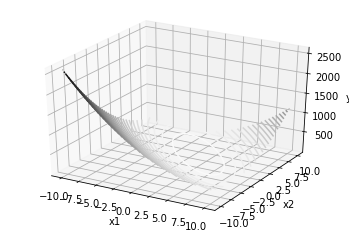

In [8]:
#BOOTH FUNCTION using tinygp (Matern series)

#BOOTH FUNCTION description
X = np.linspace((-10,-10),(10,10),100)
yerr = 0.01
y = (X[:,0] + 2*X[:,1] -7)**2 + (2*X[:,0] + X[:,1] -5)**2 + yerr * np.random.normal(size=len(X))

X1,X2 = np.meshgrid(X[:,0], X[:,1])
y_true = (X1 + 2*X2 -7)**2 + (2*X1 + X2 -5)**2
X_pred = np.vstack((X1.flatten(), X2.flatten())).T

#Plotting function
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X1, X2, y_true, 50, cmap='binary')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y');

def train_gp(nparams, build_gp_func):
    @jax.jit
    def loss(params):
        return -build_gp_func(params).log_probability(y)

    params = {
        "log_amp": np.float64(0.0),
        "log_scale": np.zeros(nparams),
    }
    solver = jaxopt.ScipyMinimize(fun=loss)
    soln = solver.run(params)
    return build_gp_func(soln.params)

#Kernel = Matern series v=5/2, uncorrelated 
def build_gp_uncorr(params):
    kernel = jnp.exp(params["log_amp"]) * transforms.Linear(
        jnp.exp(-params["log_scale"]), kernels.Matern52()
    )
    return GaussianProcess(kernel, X, diag=yerr**2)

uncorr_gp = train_gp(2, build_gp_uncorr)

y_pred = uncorr_gp.condition(y, X_pred).gp.loc.reshape(y_true.shape)

#printing results, comparing trained(predicted) data vs. true value
print(f"Predicted minimum y value using GP: {y_pred.min()}")

print(f"Minimum y value from sampled points: {y_true.min()}")

Predicted minimum y value using GP: -0.004428400832799906
Minimum y value from sampled points: 0.00509469132298575


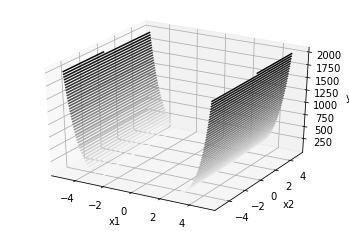

In [9]:
#THREE-HUMP CAMEL using tinygp (Matern series)

#THREE-HUMP CAMEL FUNCTION description
X = np.linspace((-5,-5),(5,5),100)
yerr = 0.01
y = 2*(X[:,0]**2) - 1.05*(X[:,0]**4) + (X[:,0]**6)/6 + X[:,0]*X[:,1] + X[:,1]**2 + yerr * np.random.normal(size=len(X))

X1,X2 = np.meshgrid(X[:,0], X[:,1])
y_true = 2*(X1**2) - 1.05*(X1**4) + (X1**6)/6 + X1*X2 + X2**2
X_pred = np.vstack((X1.flatten(), X2.flatten())).T

#Plotting function
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X1, X2, y_true, 50, cmap='binary')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y');

def train_gp(nparams, build_gp_func):
    @jax.jit
    def loss(params):
        return -build_gp_func(params).log_probability(y)

    params = {
        "log_amp": np.float64(0.0),
        "log_scale": np.zeros(nparams),
    }
    solver = jaxopt.ScipyMinimize(fun=loss)
    soln = solver.run(params)
    return build_gp_func(soln.params)

#Kernel = Matern series v=5/2, uncorrelated 
def build_gp_uncorr(params):
    kernel = jnp.exp(params["log_amp"]) * transforms.Linear(
        jnp.exp(-params["log_scale"]), kernels.Matern52()
    )
    return GaussianProcess(kernel, X, diag=yerr**2)

uncorr_gp = train_gp(2, build_gp_uncorr)

y_pred = uncorr_gp.condition(y, X_pred).gp.loc.reshape(y_true.shape)

#printing results, comparing trained(predicted) data vs. true value
print(f"Predicted minimum y value using GP: {y_pred.min()}")

print(f"Minimum y value from sampled points: {y_true.min()}")

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


Predicted minimum y value using GP: -0.9411853054080531
Minimum y value from sampled points: -0.9635009628660742


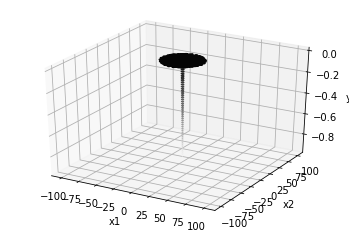

In [10]:
#EASOM FUNCTION using tinygp (Matern series)

#EASOM FUNCTION description
X = np.linspace((-100,-100),(100,100),100)
yerr = 0.01
y = -np.cos(X[:,0]) * np.cos(X[:,1]) * np.exp( -(X[:,0] - np.pi)**2 - (X[:,1] - np.pi)**2) + yerr * np.random.normal(size=len(X))

X1,X2 = np.meshgrid(X[:,0], X[:,1])
y_true = -np.cos(X1) * np.cos(X2)*np.exp( -(X1 - np.pi)**2 - (X2 - np.pi)**2)
X_pred = np.vstack((X1.flatten(), X2.flatten())).T

#Plotting function
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X1, X2, y_true, 50, cmap='binary')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y');

def train_gp(nparams, build_gp_func):
    @jax.jit
    def loss(params):
        return -build_gp_func(params).log_probability(y)

    params = {
        "log_amp": np.float64(0.0),
        "log_scale": np.zeros(nparams),
    }
    solver = jaxopt.ScipyMinimize(fun=loss)
    soln = solver.run(params)
    return build_gp_func(soln.params)

#Kernel = Matern series v=5/2, uncorrelated 
def build_gp_uncorr(params):
    kernel = jnp.exp(params["log_amp"]) * transforms.Linear(
        jnp.exp(-params["log_scale"]), kernels.Matern52()
    )
    return GaussianProcess(kernel, X, diag=yerr**2)

uncorr_gp = train_gp(2, build_gp_uncorr)

y_pred = uncorr_gp.condition(y, X_pred).gp.loc.reshape(y_true.shape)

#printing results, comparing trained(predicted) data vs. true value
print(f"Predicted minimum y value using GP: {y_pred.min()}")

print(f"Minimum y value from sampled points: {y_true.min()}")

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


Predicted minimum y value using GP: -23236.75931084573
Minimum y value from sampled points: 0.003260588842975137


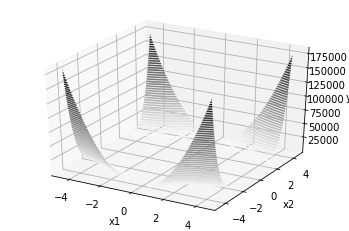

In [12]:
#BEALE FUNCTION using tinygp (Matern series)

#BEALE FUNCTION description
X = np.linspace((-4.5,-4.5),(4.5,4.5),100)
yerr = 0.01
y = -np.cos(X[:,0]) * np.cos(X[:,1]) * np.exp( -(X[:,0] - np.pi)**2 - (X[:,1] - np.pi)**2) + yerr * np.random.normal(size=len(X))

y = (1.5 - X[:,0] + X[:,0]*X[:,1])**2 + (2.25 - X[:,0] + X[:,0] * (X[:,1])**2)**2 + (2.625 - X[:,0] + X[:,0] * (X[:,1])**3)**2 + yerr * np.random.normal(size=len(X))

X1,X2 = np.meshgrid(X[:,0], X[:,1])
y_true = (1.5 - X1 + X1*X2)**2 + (2.25 - X1 + X1 * (X2)**2)**2 + (2.625 - X1 + X1 * (X2)**3)**2
X_pred = np.vstack((X1.flatten(), X2.flatten())).T

#Plotting function
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X1, X2, y_true, 50, cmap='binary')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y');

def train_gp(nparams, build_gp_func):
    @jax.jit
    def loss(params):
        return -build_gp_func(params).log_probability(y)

    params = {
        "log_amp": np.float64(0.0),
        "log_scale": np.zeros(nparams),
    }
    solver = jaxopt.ScipyMinimize(fun=loss)
    soln = solver.run(params)
    return build_gp_func(soln.params)

#Kernel = Matern series v=5/2, uncorrelated 
def build_gp_uncorr(params):
    kernel = jnp.exp(params["log_amp"]) * transforms.Linear(
        jnp.exp(-params["log_scale"]), kernels.Matern52()
    )
    return GaussianProcess(kernel, X, diag=yerr**2)

uncorr_gp = train_gp(2, build_gp_uncorr)

y_pred = uncorr_gp.condition(y, X_pred).gp.loc.reshape(y_true.shape)

#printing results, comparing trained(predicted) data vs. true value
print(f"Predicted minimum y value using GP: {y_pred.min()}")

print(f"Minimum y value from sampled points: {y_true.min()}")